# **Features From Existing Data**

**Learning objectives:**

This chapter contains the method to create features from existing data(columns). After completing this chapter, you will learn the following topics:


1. Define Polynomial Feature extraction.

2. Visualize the relationship between the polynomial variables with the target.



**Technical Requirements**

In this chapter, you will use the following Python libraries:
* Pandas,
* NumPy,
* SciPy,
* Matplotlib, and
* Scikit-learn.

Install a jupyter-notebook along with these libraries. To understand this topic, you should have familiarity with the above-mentioned libraries.


# **Feature Selection**

Sometimes, just selecting features from what we have isn't enough. We can create features in different ways from the features we already have. Well-conceived new features can sometimes capture the important information in a dataset much more effectively than the original features. The one-hot encoding method is an example.

Creating new features may seem unnecessary because the information is already in the dataset, and we need to use it. However, some algorithms struggle when features correlate significantly, or if there are redundant features. They may also struggle if there are unnecessary features.

For this reason, we create new features from the features we already have.

> *Feature selection is a process that chooses a subset of features from the original features so that the feature space is optimal according to a certain criterion.*

**Recap...**

1. *Features : Often the input variables (features) in raw data.*

2. *Feature Engineering : Feature engineering refers to the process of designing the types of features that will be used in a classifier or predictor*

3. *Feature extraction : Feature extraction refers to the actual step of converting raw data into vector of feature values.*

4. *Feature Selection : Feature selection refers to choosing a subset of specific features out of all the features you have engineered and extracted. Feature selection is a form of dimensionality reduction.*

5. *Dimensionality reduction : Dimensionality reduction refers to the process of reducing the number of features in your data.*





# **Polynomial Feature**



Polynomial Feature generates a new feature matrix consisting of all polynomial combinations of the features with a degree less than or equal to the specified degree. It adds complexity to numeric input to linear models with little features data by combining features.

For example, if an input sample is two dimensional and of the form $[a, b] $ , the degree-2 polynomial features are $ [1, a, b, $ $a^2 $ $, ab,$ $ b^2 $].



**Note ...**


*If your example data has lots of missing values(NaN) and you replaced all the missing values in a feature by 0. Then all the cross-products using this feature will be 0. Additionally, if you don’t replace missing values, creating polynomial features will raise a value error in the fit_transform phase, since the input should be finite. Therefore, before handling missing values, you need to decide if you want to use polynomial features or not.*

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 4, 6])
poly = PolynomialFeatures(3,include_bias=False) # if bias = True: all elements in first columln is 1
poly.fit_transform(x[:, None])

array([[  2.,   4.,   8.],
       [  4.,  16.,  64.],
       [  6.,  36., 216.]])



```
poly.fit_transform(x[:, None]) method has converted our one-dimensional array(x) into a three-dimensional array.
```



 The derived feature matrix has one column representing $x $, and a second column representing $x^2 $, and a third column representing $x^3$.

**Example of Linear Regression with PolynomialFeatures**

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
boston = load_boston()

In [ ]:
#create the dataframe
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names  # rename all column names
df.head() # show top 5 rows of dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


_Separate the dataset into training and testing sets:_

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = boston.target # values to be predicted

In [ ]:
x = df[['LSTAT', 'RM', 'NOX']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
x,y, test_size=0.3,
random_state=0)

_Let's set up the polynomial expansion transformer from scikit-learn, to create
features by polynomial combination of a degree < = 3._

In [ ]:
poly = PolynomialFeatures(degree=3, interaction_only=False,
include_bias=False)

_Let's fit the transformer to the train set so that it learns all of the possible
polynomial combinations of three of the variables._

In [ ]:
poly.fit(X_train)

PolynomialFeatures(degree=3, include_bias=False, interaction_only=False,
                   order='C')

_Let's now create the new polynomial features in a new dataset:_

In [ ]:
train_t = poly.transform(X_train)
test_t = poly.transform(X_test)

_The code returns a list with the names of each feature combination after
the polynomial expansion:_

In [ ]:
poly.get_feature_names(['LSTAT', 'RM', 'NOX'])

['LSTAT',
 'RM',
 'NOX',
 'LSTAT^2',
 'LSTAT RM',
 'LSTAT NOX',
 'RM^2',
 'RM NOX',
 'NOX^2',
 'LSTAT^3',
 'LSTAT^2 RM',
 'LSTAT^2 NOX',
 'LSTAT RM^2',
 'LSTAT RM NOX',
 'LSTAT NOX^2',
 'RM^3',
 'RM^2 NOX',
 'RM NOX^2',
 'NOX^3']

_Why dont we visualize the relationship of the polynomial variables with the target?_

In [ ]:
import matplotlib.pyplot as plt

_Let's create a function to make multiple subplots, each displaying one of the new
polynomial features in a scatter plot versus the target._

In [ ]:
def plot_features(df, target):
    nb_rows = 5
    nb_cols = 4
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(12, 12))
    plt.subplots_adjust(wspace=None, hspace=0.4)
    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            if n!=19:
                axs[i, j].scatter(df[df.columns[n]], target)
                axs[i, j].set_title(df.columns[n])
                n += 1
plt.show()

_Capture the arrays with the polynomial features in a dataframe as
follows:_

In [ ]:
test_t = pd.DataFrame(test_t) # new polynomial feature
test_t.columns = poly.get_feature_names(['LSTAT', 'RM', 'NOX']) # get features name

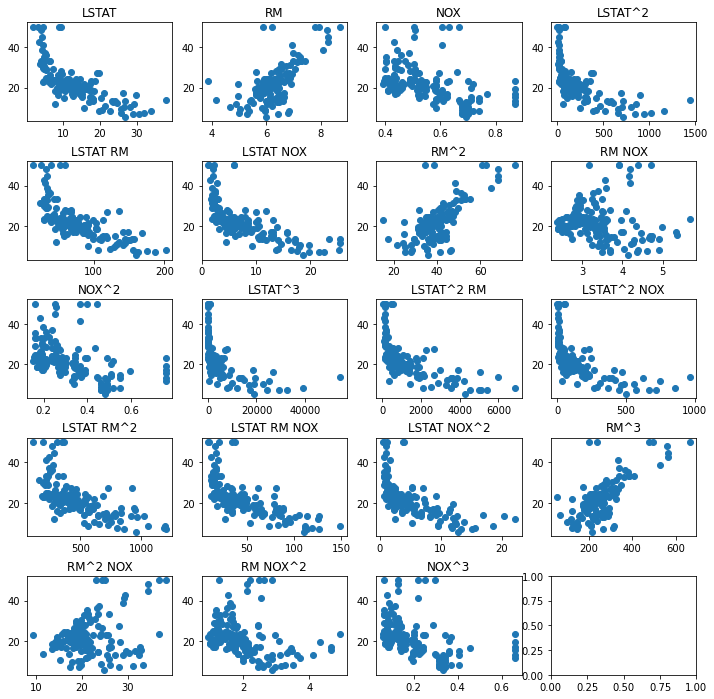

In [ ]:
plot_features(test_t, y_test)

_Take LSTAT column only._

In [ ]:
X = df[['LSTAT']] # take only LSTAT column for X value

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42,shuffle=True)
#Split arrays or matrices into random train and test subsets

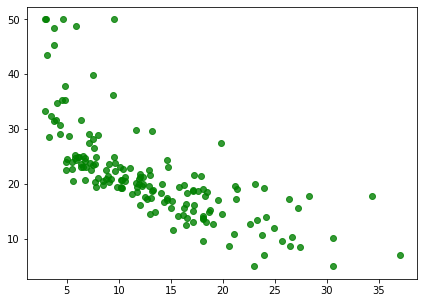

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(x_test, y_test, alpha=0.8,color='g') # scatterplot


Let's make this dataset complex using $PolynomialFeatures()$ and fit this dataset using $LinearRegression$

In [ ]:
from sklearn.linear_model import LinearRegression

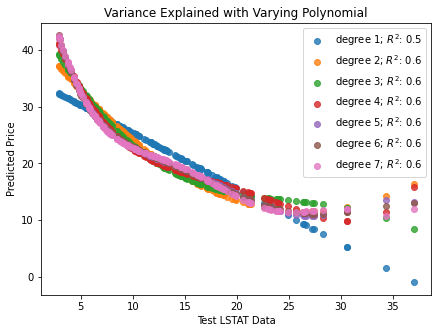

In [ ]:
plt.figure(figsize=(7,5))
for i in range(1,8):
    # With this transform in place, we can use the linear model to fit much more complicated relationships between x and y.
    model = make_pipeline(PolynomialFeatures(i), LinearRegression())
    model.fit(x_train,y_train)
    y_plot = model.predict(x_test)
    plt.scatter(x_test, y_plot, label="degree %d" % i +'; $R^2$: %.2f' % model.score(x_test, y_test))
plt.legend(loc='upper right')

plt.xlabel("Test LSTAT Data")

plt.ylabel("Predicted Price")

plt.title("Variance Explained with Varying Polynomial")

plt.show()

*We can notice that $R^2$ has increased from $0.49 – > 0.57 -> 0.59 -> 0.61  -> 0.62 .$ Rising in the degree of the polynomial increased $R^2 $ initially and then it has saturated at $0.62$ at degree $5 $.*

_The interesting point here is  at degree 1 you can see a straight blue line which gradually changed into a curve at higher degrees._

_Let's plot the curve at degree 5._

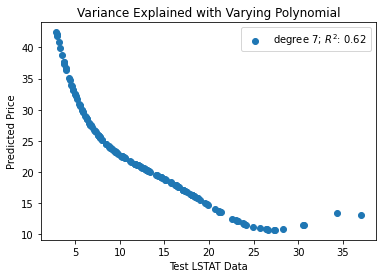

In [ ]:
model = make_pipeline(PolynomialFeatures(5), LinearRegression())
model.fit(x_train,y_train)
y_plot = model.predict(x_test)
plt.scatter(x_test, y_plot, label="degree %d" % i +'; $R^2$: %.2f' % model.score(x_test, y_test))
plt.legend(loc='upper right')

plt.xlabel("Test LSTAT Data")

plt.ylabel("Predicted Price")

plt.title("Variance Explained with Varying Polynomial")

plt.show()

***make_pipeline()***
Construct a Pipeline from the given estimators.

[make_pipeline()](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)

__Advantages of using Polynomial Regression:__

- Polynomial regression provides the best approximation of the relationship between the dependent and independent variable.
- A Broad range of function can be fit under it.
- Polynomial ewgression fits a wide range of curves.

**Disadvantages of using Polynomial Regression:**

-  Polynomial Regression is too sensitive to the outliers.
because the presence outliers in the data can seriously affect the results of the nonlinear analysis.


# **Key take away**



* Feature selection is a process that chooses a subset of features from the original features so that the feature space is optimal according to a certain criterion.

* Polynomial Feature generates a new feature matrix consisting of all polynomial combinations of the features with a degree less than or equal to the specified degree.

* Polynomial Feature adds complexity in inputs to linear models.

* Before handling missing values, you need to decide if you want to use polynomial features or not.